# Introduction to Machine Learning 4 by Ale Seun Joseph

# Multiple Linear Regression 

Problem Statement:
A bike-sharing paid or free system which ensures bikes availability for shared use to people on a short term basis. while some bike share systems allow people to borrow a bike from a "dock" which is usually controlled by systems others  payment information entered by clients, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# ignore warning prompts
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries for data importing and processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import dataset
#https://github.com/seunale/datasets
bike = pd.read_csv(r'C:\Users\USER\Desktop\Lasop\bike.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Wrangling

In [4]:
# data information, data types, memory, non null
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#summary/descriptive stats for numeric types
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# shape to know number of rows and columns
bike.shape

(730, 16)

Findings so far:

There are 730 rows and 16 columns in the dataset.

All columns are either float or integer data type, except dteday which is object.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [7]:
# null percentage row 
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [8]:
# null percentage column
round((bike.isnull().sum(axis=0)/len(bike))*100,2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

No missing value both on rows and columns

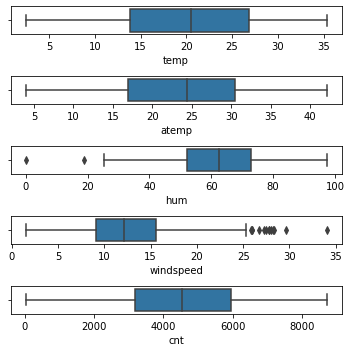

In [9]:
#Checking for outliers on all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(5, figsize = (5,5))
plt1 = sns.boxplot(bike['temp'], ax = axs[0])
plt2 = sns.boxplot(bike['atemp'], ax = axs[1])
plt3 = sns.boxplot(bike['hum'], ax = axs[2])
plt4 = sns.boxplot(bike['windspeed'], ax = axs[3])
plt5 = sns.boxplot(bike['cnt'], ax = axs[4])
plt.tight_layout() # we didn't use plt.show() because it will title all plots.

There is outliers only in wind speed and humidity

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

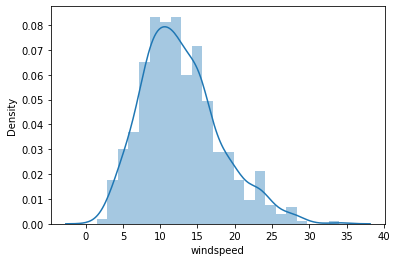

In [10]:
sns.distplot(bike['windspeed'], kde = True)

according to domain experts and findings on google, wind speed is normally distributed

In [11]:
mean = bike['windspeed'].mean()
print(mean)

12.763619654657532


In [12]:
lower_bound = mean - 1.5*bike['windspeed'].std()
upper_bound = mean + 1.5*bike['windspeed'].std()
print(lower_bound)
print(upper_bound)

4.96985859853684
20.557380710778226


In [13]:
bike.loc[bike['windspeed']>=21, 'windspeed']= 21

<AxesSubplot:xlabel='windspeed'>

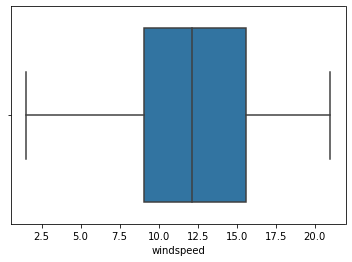

In [14]:
sns.boxplot(bike['windspeed'])

<AxesSubplot:xlabel='hum', ylabel='Density'>

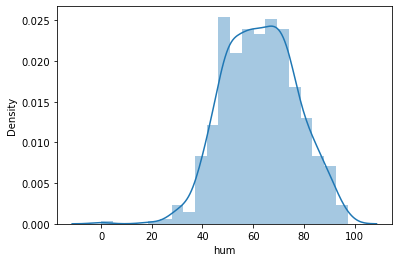

In [15]:
sns.distplot(bike['hum'], kde = True)

In [16]:
iqr = bike.hum.quantile(0.75) - bike.hum.quantile(0.25)
print(iqr)

20.989575000000002


In [17]:
lower_bridge = bike.hum.quantile(0.25) - (iqr*1.5)
upper_bridge = bike.hum.quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

20.515637499999997
104.4739375


In [18]:
bike.loc[bike['hum']>=104, 'hum']= 104

In [19]:
bike.loc[bike['hum']<=21, 'hum']= 21

<AxesSubplot:xlabel='hum'>

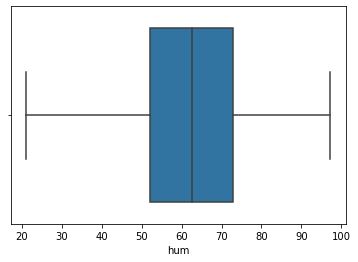

In [20]:
sns.boxplot(bike['hum'])

The outliers are fixed

Duplicate

In [21]:
bike_duplicate = bike.copy()

In [22]:
# search duplicates and drop all duplicates in row if any
bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [23]:
bike_duplicate.shape

(730, 16)

In [24]:
bike.shape

(730, 16)

There are no duplicates since shape remains the same

Data Cleaning

Value count helps in identifying junks in the dataset

make copy of the  dataframe, with exception of 'instant' column, 

It has unique values, value count on it is irrelevant.

In [25]:
bike_temp = bike.iloc[:,1:16]

In [26]:
bike_temp.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
for col in bike_temp:
    print(bike_temp[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

Dataset is Junks free.

Removing unwanted columns

After critical examination of the dataset, we can remove the following columns with reasons:

instant : just showing index

dteday : we have year, month and day column already, there is no need for date

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

The remaining data will be saved as bike_df, so that we can keep the original dataset for future analysis/validation

In [28]:
# let's print all the columns again
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [29]:
#new dataframe to drop the unnecessary columns
bike_df = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [30]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [32]:
# using dummy variables to handle the categorical features
#first convert the features to categorical
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

The rationale behind this is that no season is better than the other neither is any day bigger than another, so want to prevent python from seeing them as continous data

In [33]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [34]:
bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [35]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
data = bike_df.copy()

It created dummies for the categorical variables
It also drops the original variable for which the dummy was created
Finally, it also drop first dummy variable for each set of dummies created.

In [37]:
# The 'random_state' is always specified so that the train and test 
# set will have the same rows, respectively
# 80% training set and 20% test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.80, 
                                     test_size = 0.20, random_state = 300)

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
80,0,0,1,18.108347,22.03210,62.4583,15.125250,2703,1,0,...,0,0,0,1,0,0,0,0,0,0
425,1,0,1,14.486653,17.99210,65.7083,9.708568,3194,0,0,...,0,0,0,0,0,0,1,0,1,0
164,0,0,1,24.770847,29.57730,50.7083,18.041961,4891,1,0,...,0,0,0,1,0,0,0,0,0,0
300,0,0,1,13.564153,15.94060,58.5833,15.375093,3747,0,0,...,0,0,0,0,0,0,1,0,1,0
104,0,1,0,18.313347,22.09565,67.1250,15.167125,3126,1,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 80 to 209
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            584 non-null    int64  
 1   holiday       584 non-null    int64  
 2   workingday    584 non-null    int64  
 3   temp          584 non-null    float64
 4   atemp         584 non-null    float64
 5   hum           584 non-null    float64
 6   windspeed     584 non-null    float64
 7   cnt           584 non-null    int64  
 8   season_2      584 non-null    uint8  
 9   season_3      584 non-null    uint8  
 10  season_4      584 non-null    uint8  
 11  mnth_2        584 non-null    uint8  
 12  mnth_3        584 non-null    uint8  
 13  mnth_4        584 non-null    uint8  
 14  mnth_5        584 non-null    uint8  
 15  mnth_6        584 non-null    uint8  
 16  mnth_7        584 non-null    uint8  
 17  mnth_8        584 non-null    uint8  
 18  mnth_9        584 non-null   

In [40]:
df_train.shape

(584, 30)

In [41]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
146,0,0,1,27.948347,31.85040,65.3750,16.125493,4679,1,0,...,0,0,0,0,0,0,1,0,0,0
263,0,0,1,24.395000,27.52665,90.0000,6.459081,4352,0,1,...,0,0,0,0,1,0,0,0,1,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
552,1,0,0,35.328347,40.24565,49.2083,10.958118,4840,0,1,...,0,0,0,0,0,0,0,1,0,0
302,0,0,0,13.085847,16.06645,62.3750,11.833339,3331,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 146 to 226
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            146 non-null    int64  
 1   holiday       146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   atemp         146 non-null    float64
 5   hum           146 non-null    float64
 6   windspeed     146 non-null    float64
 7   cnt           146 non-null    int64  
 8   season_2      146 non-null    uint8  
 9   season_3      146 non-null    uint8  
 10  season_4      146 non-null    uint8  
 11  mnth_2        146 non-null    uint8  
 12  mnth_3        146 non-null    uint8  
 13  mnth_4        146 non-null    uint8  
 14  mnth_5        146 non-null    uint8  
 15  mnth_6        146 non-null    uint8  
 16  mnth_7        146 non-null    uint8  
 17  mnth_8        146 non-null    uint8  
 18  mnth_9        146 non-null  

In [43]:
df_test.shape

(146, 30)

EXPLORATORY DATA ANALYSIS

EDA will be performed on the training set (df_train).

In [44]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

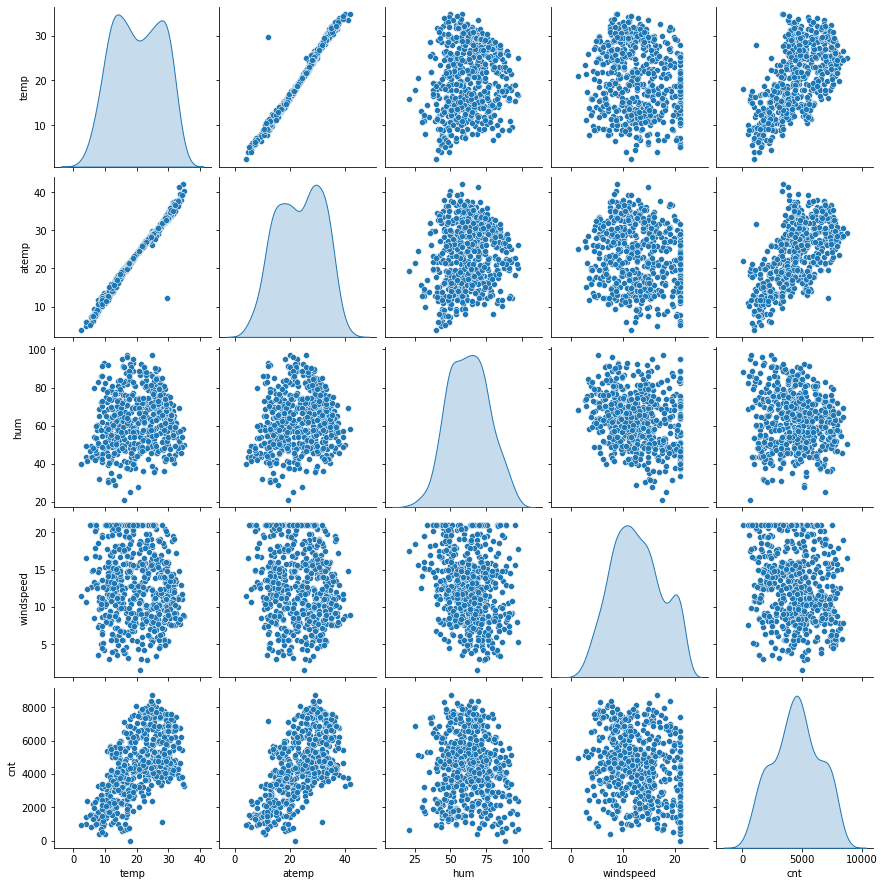

In [45]:
# dataframe for only numeric dfs:

num_bike = df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(num_bike, diag_kind ='kde')
plt.show()

The Pair-Plot shows a relation between 'temp','atemp' and 'cnt'columns

 Catagorical Variables Visuals

boxplot of all categorical variables (before creating dummies) against the target variable 'cnt' will help us to see how each of the independent variables stackup against the dependent variable.

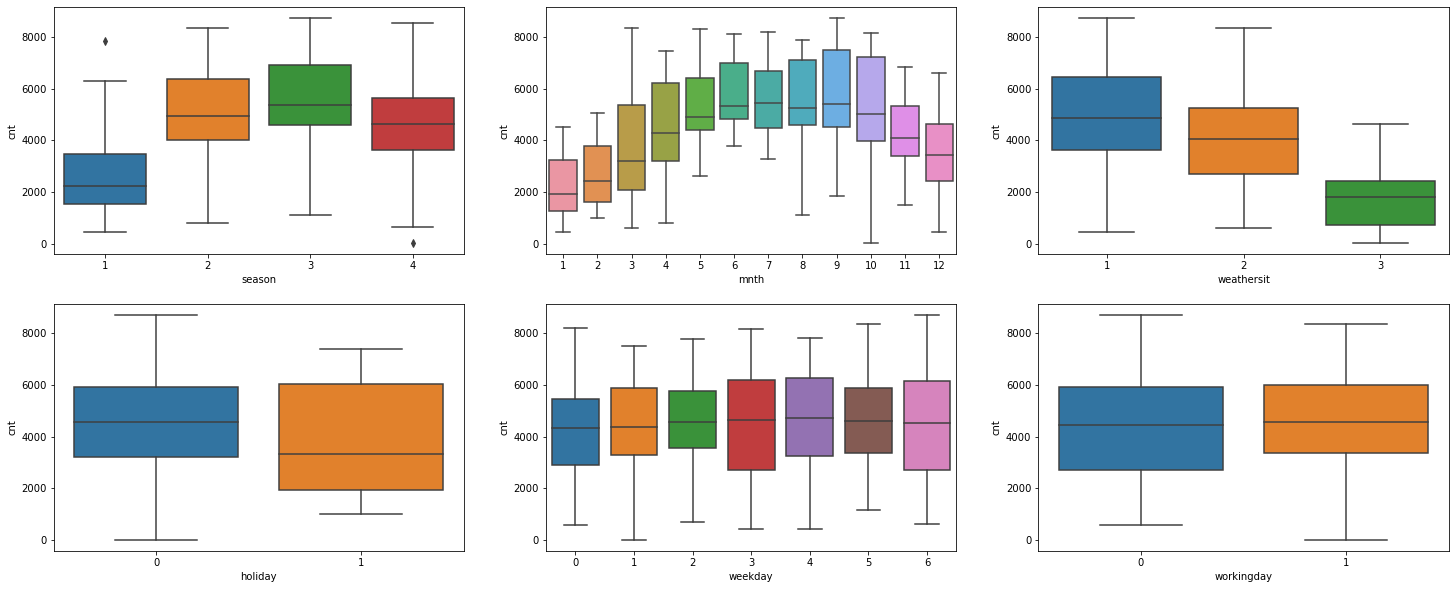

In [46]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

A total of six categorical features were present in bike dataset.

Box plots were used to study the effects of the categorical features on the dependent variable (‘cnt’).

The inference shows that:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

Correlation Matrix

Let's cexamine the correlation coefficients to see which variables are highly correlated. Note:

we are only using our new dataframe here (data). 

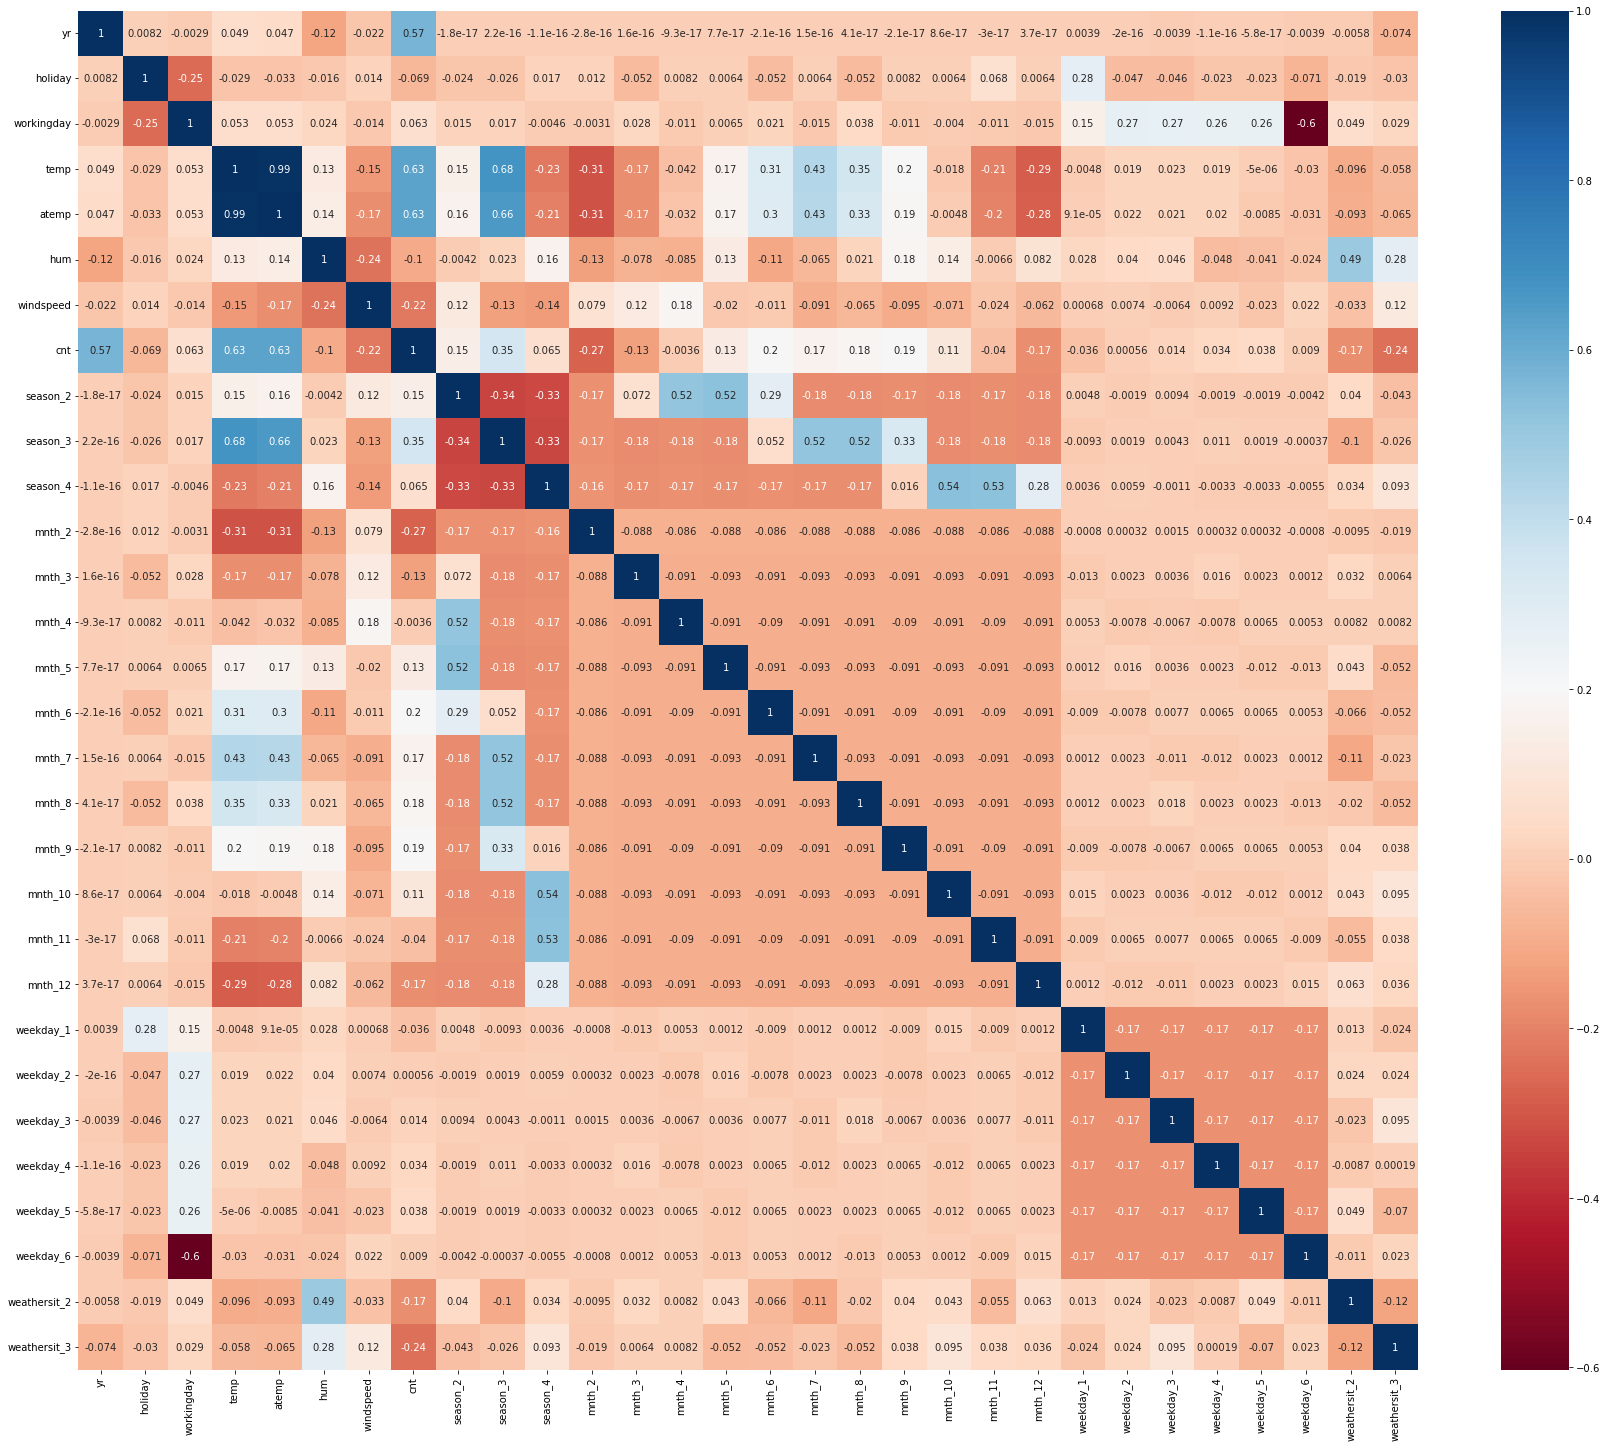

In [47]:
plt.figure(figsize = (30,25))
sns.heatmap(data.corr(), annot = True, cmap="RdBu")
plt.show()

The heatmap clearly shows the variables that shows multi-collinearity, and which variable have high collinearity with the dependent variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

FEATURES SCALING

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
# don't forget scaling is only for numeric data types
# let's check info again to see them
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 80 to 209
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            584 non-null    int64  
 1   holiday       584 non-null    int64  
 2   workingday    584 non-null    int64  
 3   temp          584 non-null    float64
 4   atemp         584 non-null    float64
 5   hum           584 non-null    float64
 6   windspeed     584 non-null    float64
 7   cnt           584 non-null    int64  
 8   season_2      584 non-null    uint8  
 9   season_3      584 non-null    uint8  
 10  season_4      584 non-null    uint8  
 11  mnth_2        584 non-null    uint8  
 12  mnth_3        584 non-null    uint8  
 13  mnth_4        584 non-null    uint8  
 14  mnth_5        584 non-null    uint8  
 15  mnth_6        584 non-null    uint8  
 16  mnth_7        584 non-null    uint8  
 17  mnth_8        584 non-null    uint8  
 18  mnth_9        584 non-null   

In [50]:
num_df = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [51]:
df_train[num_df] = scaler.fit_transform(df_train[num_df])

In [52]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
80,0,0,1,0.484201,0.474613,0.543715,0.698727,0.308445,1,0,...,0,0,0,1,0,0,0,0,0,0
425,1,0,1,0.372391,0.368552,0.586338,0.420945,0.364933,0,0,...,0,0,0,0,0,0,1,0,1,0
164,0,0,1,0.689888,0.672694,0.389617,0.848304,0.560170,1,0,...,0,0,0,1,0,0,0,0,0,0
300,0,0,1,0.343911,0.314694,0.492896,0.711540,0.428555,0,0,...,0,0,0,0,0,0,1,0,1,0
104,0,1,0,0.490530,0.476281,0.604918,0.700874,0.357110,1,0,...,0,0,0,0,0,0,1,0,0,0


all the numeric features are successfully scaled

In [53]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.494863,0.029110,0.690068,0.549259,0.516016,0.544456,0.573195,0.513300,0.246575,0.261986,...,0.085616,0.090753,0.147260,0.143836,0.140411,0.148973,0.138699,0.140411,0.335616,0.027397
std,0.500402,0.168258,0.462862,0.233986,0.216493,0.185655,0.242466,0.221659,0.431387,0.440092,...,0.280037,0.287504,0.354669,0.351224,0.347711,0.356367,0.345928,0.347711,0.472610,0.163378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.350768,0.338253,0.399864,0.386210,0.360734,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549072,0.525578,0.543169,0.556323,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754230,0.694243,0.680054,0.735598,0.678469,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 LINEAR MODEL

In [54]:
# specifying X and Y ( dependent and independent features)
y_train = df_train.pop('cnt')
X_train = df_train

Feature Selection

We will be using the LinearRegression function from SciKit Learn (sklearn) for its compatibility with recursive feature elimination.

RFE is a feature selection process that reduces a model’s complexity by choosing significant features and removing the weaker ones. 

In [55]:
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 15
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
rfe = RFE(model, 15)           
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', True, 1),
 ('mnth_6', False, 4),
 ('mnth_7', False, 10),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 11),
 ('weekday_1', False, 8),
 ('weekday_2', False, 15),
 ('weekday_3', False, 14),
 ('weekday_4', False, 13),
 ('weekday_5', False, 12),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [59]:
column = X_train.columns[rfe.support_]
column # all selected features marked as true

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_] # all unselected features marked as false

Index(['holiday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

.support_ gives a boolean mask with False values for discarded features.

In [61]:
# X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

Linear Model with 'STATS MODEL'

1st Model

Variance inflation factor (VIF) of the features (featured variables)


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all 
#the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,
                                        i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,405.63
3,atemp,389.08
4,hum,12.90
7,season_3,7.43
5,windspeed,4.98
1,workingday,4.50
6,season_2,3.96
8,season_4,2.90
13,weathersit_2,2.33
0,yr,1.94


In [63]:
import statsmodels.api as sm

# Adding intercept (a constant)
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model1 = sm.OLS(y_train, X_train_lm1).fit()

In [64]:
model1.params

const           0.161133
yr              0.230663
workingday      0.051237
temp            0.361133
atemp           0.054500
hum            -0.141951
windspeed      -0.087839
season_2        0.137031
season_3        0.107743
season_4        0.154617
mnth_5          0.037435
mnth_9          0.104942
mnth_10         0.078908
weekday_6       0.062483
weathersit_2   -0.052074
weathersit_3   -0.221289
dtype: float64

In [65]:
# summary model obtained
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.53e-216
Time:                        02:03:46   Log-Likelihood:                 591.59
No. Observations:                 584   AIC:                            -1151.
Df Residuals:                     568   BIC:                            -1081.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1611      0.023      7.107   

2nd Model

We remove the variable 'atemp' based on its High p-value & High VIF (389.08)

High vif shows high multi-collinearity

higher pvalue have tendency of altering the result in favour of the particular feature

In [66]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

VIF for new X_train

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names 
# of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, 
                                        i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.88
3,hum,12.61
6,season_3,7.39
4,windspeed,4.88
1,workingday,4.50
5,season_2,3.95
7,season_4,2.89
12,weathersit_2,2.32
0,yr,1.94
11,weekday_6,1.69


In [68]:
# Add a intercept (constant)
X_train_lm2 = sm.add_constant(X_train_new)

#  fit the model
model2 = sm.OLS(y_train, X_train_lm2).fit()

In [69]:
model2

In [70]:
model2.params

const           0.161878
yr              0.230607
workingday      0.051209
temp            0.411467
hum            -0.141066
windspeed      -0.088962
season_2        0.137387
season_3        0.107235
season_4        0.154838
mnth_5          0.037312
mnth_9          0.104937
mnth_10         0.079152
weekday_6       0.062476
weathersit_2   -0.052272
weathersit_3   -0.221662
dtype: float64

In [71]:
# model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.11e-217
Time:                        02:03:47   Log-Likelihood:                 591.50
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     569   BIC:                            -1087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1619      0.023      7.167   

Variable 'hum' have Very High 'VIF' value.Thus we remove it
Even though the VIF of humidity is second highest, we decided to drop 'hum' and not temperature based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [72]:
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

check VIF

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names 
# of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, 
                                        i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,18.06
5,season_3,7.04
3,windspeed,4.78
1,workingday,4.33
4,season_2,3.87
6,season_4,2.81
0,yr,1.94
10,weekday_6,1.63
7,mnth_5,1.60
9,mnth_10,1.58


In [74]:
# adding intercept/constant
X_train_lm3 = sm.add_constant(X_train_new1)

# Create a first fitted model
model3 = sm.OLS(y_train, X_train_lm3).fit()

In [75]:
model3

In [76]:
model3.params

const           0.094412
yr              0.236301
workingday      0.055128
temp            0.376921
windspeed      -0.065420
season_2        0.144940
season_3        0.118609
season_4        0.150443
mnth_5          0.026467
mnth_9          0.093937
mnth_10         0.078831
weekday_6       0.064981
weathersit_2   -0.082228
weathersit_3   -0.278988
dtype: float64

In [77]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     223.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.08e-213
Time:                        02:03:48   Log-Likelihood:                 579.23
No. Observations:                 584   AIC:                            -1130.
Df Residuals:                     570   BIC:                            -1069.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0944      0.018      5.143   

Model 4

Removing the variable 'season3' based on its Very High 'VIF' value.
Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [78]:
X_train_new2 = X_train_new1.drop(["season_3"], axis = 1)

Check VIF

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all
#the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values,
                                        i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.04
3,windspeed,4.57
1,workingday,4.30
4,season_2,2.10
0,yr,1.92
5,season_4,1.91
9,weekday_6,1.63
6,mnth_5,1.57
8,mnth_10,1.54
10,weathersit_2,1.54


In [80]:
# Add a intercept/constant
X_train_lm4 = sm.add_constant(X_train_new2)

# Create a first fitted model
model4 = sm.OLS(y_train, X_train_lm4).fit()

In [81]:
model4

In [82]:
model4.params

const           0.071904
yr              0.233402
workingday      0.055501
temp            0.528650
windspeed      -0.069978
season_2        0.084460
season_4        0.111490
mnth_5          0.013124
mnth_9          0.110576
mnth_10         0.061510
weekday_6       0.068329
weathersit_2   -0.084279
weathersit_3   -0.278811
dtype: float64

In [83]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     225.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.95e-207
Time:                        02:03:49   Log-Likelihood:                 561.60
No. Observations:                 584   AIC:                            -1097.
Df Residuals:                     571   BIC:                            -1040.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0719      0.019      3.887   

5th Model 

Removing the variable 'mnth_10' based on its Very High p-value.

In [84]:
X_train_new3 = X_train_new2.drop(["mnth_10"], axis = 1)

Check VIF 

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names 
#of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, 
                                        i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.56
1,workingday,4.27
4,season_2,2.10
0,yr,1.92
8,weekday_6,1.63
6,mnth_5,1.57
9,weathersit_2,1.54
5,season_4,1.42
7,mnth_9,1.19


In [86]:
# Add an intercept/constant
X_train_lm5 = sm.add_constant(X_train_new3)

# Create a first fitted model
model5 = sm.OLS(y_train, X_train_lm5).fit()

In [87]:
model5

In [88]:
model5.params

const           0.066270
yr              0.233509
workingday      0.054000
temp            0.540029
windspeed      -0.068924
season_2        0.083196
season_4        0.132285
mnth_5          0.012119
mnth_9          0.102275
weekday_6       0.068512
weathersit_2   -0.082716
weathersit_3   -0.275897
dtype: float64

In [89]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     239.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.88e-206
Time:                        02:03:50   Log-Likelihood:                 554.97
No. Observations:                 584   AIC:                            -1086.
Df Residuals:                     572   BIC:                            -1034.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0663      0.019      3.557   

6th Model 

Removing the variable 'mnth_5' based on its High 'p-value'.

In [90]:
X_train_new4 = X_train_new3.drop(["mnth_5"], axis = 1)

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, 
                                        i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.86
3,windspeed,4.51
1,workingday,4.27
0,yr,1.92
7,weekday_6,1.63
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.42
6,mnth_9,1.19
9,weathersit_3,1.09


In [92]:
X_train_lm6 = sm.add_constant(X_train_new4)

# Create a first fitted model
model6 = sm.OLS(y_train, X_train_lm6).fit()

In [93]:
model6

In [94]:
model6.params

const           0.066284
yr              0.233445
workingday      0.053847
temp            0.541136
windspeed      -0.069921
season_2        0.087342
season_4        0.132322
mnth_9          0.101950
weekday_6       0.068372
weathersit_2   -0.082270
weathersit_3   -0.276255
dtype: float64

In [95]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     263.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          6.14e-207
Time:                        02:03:51   Log-Likelihood:                 554.70
No. Observations:                 584   AIC:                            -1087.
Df Residuals:                     573   BIC:                            -1039.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0663      0.019      3.560   

This model looks good, as the Multicollinearity between the predictors and the p-values looks insignificant. Thus all the predictors seems to be significant. For now, we will consider this as our final model (unless the test data metrics are not significantly close to this number).

Hypothesis Testing:
    
Hypothesis testing states that:

H0:B1=B2=...=Bn=0

H1: at least one Bi!=0

6th model variables and their coefficients

const           0.071120

yr              0.233890

workingday      0.053886

temp            0.538243

windspeed      -0.096666

season_2        0.087062

season_4        0.131195

mnth_9          0.101298

weekday_6       0.068487

weathersit_2   -0.082301

weathersit_3   -0.274161

From the model6 summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 267.0
Prob (F-statistic): 2.93e-208
The F-Statistics value of 267.0 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

The equation of best fitted surface based on model6:
 
Sales = 0.071120 + 0.233890yr + 0.053886workingday + 0.538243temp 
 -0.096666windspeed + 0.087062season_2 + 0.131195season_4 + 0.101298mnth_9 + 0.068487weekday_6 - 0.082301weathersit_2 - 0.274161weathersit_3
 

Coefficients Explanations:

temp: A coefficient value of ‘0.538243’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.538243 units.

weathersit_3: A coefficient value of ‘- 0.274161’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.274161units.

yr: A coefficient value of ‘0.233890’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.233890 units.

season_4: A coefficient value of ‘0.131195’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.131195 units.

windspeed: A coefficient value of ‘-0.096666’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.096666 units.

workingday: A coefficient value of ‘0.053886’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.053886 units.

season_2: A coefficient value of ‘0.087062’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.087062 units.

mnth_9: A coefficient value of ‘0.101298’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.101298 units.

weekday_6: A coefficient value of ‘0.068487’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.068487 units.

weathersit_2: A coefficient value of ‘- 0.082301’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by  0.082301 units.

const: The Constant value of ‘0.071120’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.071120 units.



ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

Residual Analysis Of Training Data

In [96]:
y_train_pred = model6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

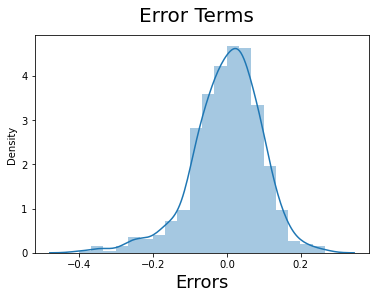

In [97]:
residual = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

There is a linear relationship between X and Y

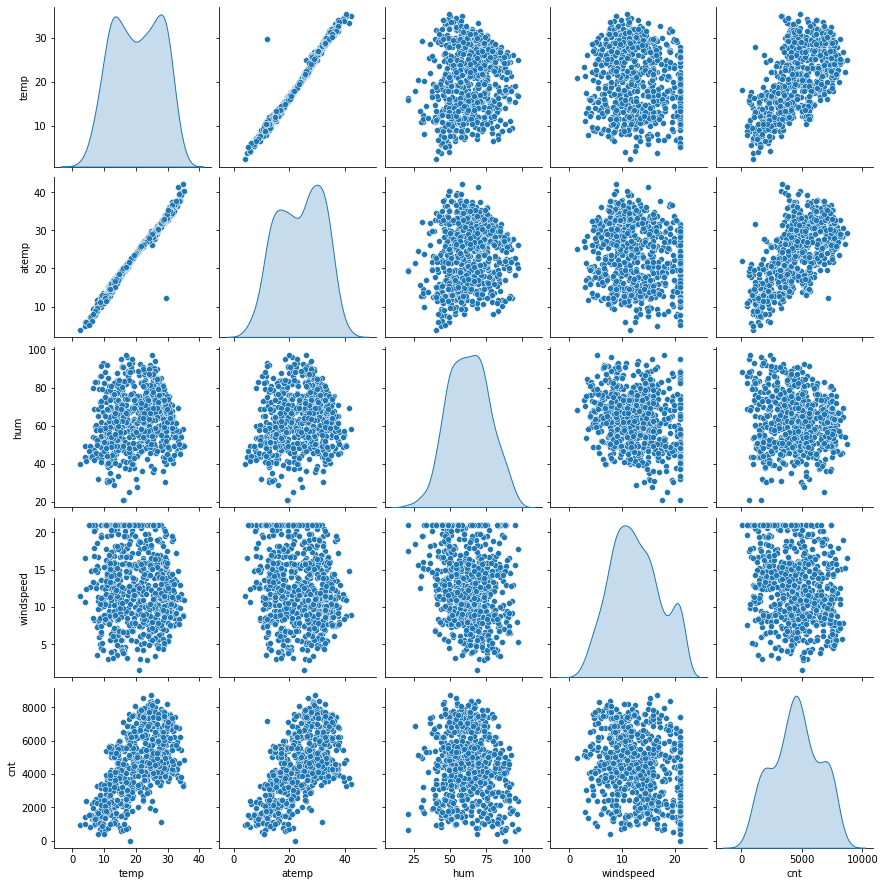

In [98]:
num_data = data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(num_data, diag_kind='kde')
plt.show()

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

There is No Multicollinearity between the predictor variables

In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, 
                                        i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.86
3,windspeed,4.51
1,workingday,4.27
0,yr,1.92
7,weekday_6,1.63
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.42
6,mnth_9,1.19
9,weathersit_3,1.09


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model6

In [100]:
# scaling the test sets
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
146,0,0,1,0.787985,0.732369,0.581967,0.750022,0.535780,1,0,...,0,0,0,0,0,0,1,0,0,0
263,0,0,1,0.678285,0.618859,0.904918,0.254303,0.498159,0,1,...,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.449393,0.438975,0.539344,0.476521,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
552,1,0,0,1.015822,0.952767,0.369945,0.485025,0.554303,0,1,...,0,0,0,0,0,0,0,1,0,0
302,0,0,0,0.329145,0.317998,0.542623,0.529909,0.380695,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.520548,0.027397,0.657534,0.565249,0.531387,0.562961,0.531987,0.527337,0.273973,0.239726,...,0.068493,0.061644,0.130137,0.136986,0.143836,0.116438,0.157534,0.157534,0.342466,0.034247
std,0.501297,0.163800,0.476168,0.222901,0.203807,0.183299,0.218719,0.227413,0.447530,0.428386,...,0.253460,0.241335,0.337612,0.345016,0.352131,0.321854,0.365558,0.365558,0.476168,0.182488
min,0.000000,0.000000,0.000000,0.139184,0.125758,0.000000,0.083350,0.069604,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359998,0.342028,0.436202,0.387298,0.381759,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.593900,0.574474,0.562842,0.505369,0.531466,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759241,0.705640,0.694535,0.663978,0.706742,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.015822,0.952767,0.956807,1.000000,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [102]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 146 to 226
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            146 non-null    int64  
 1   holiday       146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   atemp         146 non-null    float64
 5   hum           146 non-null    float64
 6   windspeed     146 non-null    float64
 7   season_2      146 non-null    uint8  
 8   season_3      146 non-null    uint8  
 9   season_4      146 non-null    uint8  
 10  mnth_2        146 non-null    uint8  
 11  mnth_3        146 non-null    uint8  
 12  mnth_4        146 non-null    uint8  
 13  mnth_5        146 non-null    uint8  
 14  mnth_6        146 non-null    uint8  
 15  mnth_7        146 non-null    uint8  
 16  mnth_8        146 non-null    uint8  
 17  mnth_9        146 non-null    uint8  
 18  mnth_10       146 non-null  

In [103]:
#using only the variables of the final model.
col1= X_train_new4.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 146 to 226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         146 non-null    float64
 1   yr            146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   windspeed     146 non-null    float64
 5   season_2      146 non-null    uint8  
 6   season_4      146 non-null    uint8  
 7   mnth_9        146 non-null    uint8  
 8   weekday_6     146 non-null    uint8  
 9   weathersit_2  146 non-null    uint8  
 10  weathersit_3  146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 7.7 KB


In [104]:
y_pred = model6.predict(X_test_lm6)

MODEL EVALUATION

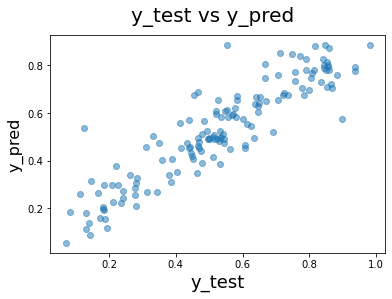

In [105]:
# Graph of y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

R^2 Value for TEST

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8257497877517598

Adjusted R^2 Value for TEST

In [107]:
# R^2 was found to be

r2 = 0.827828906169094

In [108]:
X_test.shape

(146, 10)

In [109]:
# 146 rows and 10 columns

In [110]:
# let p be number of rows in X_test

p = X_test.shape[0]
p

146

In [111]:
# let q be number of columns in X_test
q = X_test.shape[1]
q

10

In [112]:
# Adjusted R-squared is given by

adjusted_r2 = 1-(1-r2)*(p-1)/(p-q-1)
adjusted_r2

0.815075491811249

The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.

Final Result Comparison

Train R^2 :0.823

Train Adjusted R^2 :0.820

Test R^2 :0.828

Test Adjusted R^2 :0.815

This looks like a really good model that can very well 'Generalize' different datasets for bike.

FINAL REPORT
As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.538243’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.538243 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘- 0.274161’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.274161 units.

Year (yr) - A coefficient value of ‘0.233890’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.233890 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are

season_4: - A coefficient value of ‘0.131195’ indicated that w.r.t season_2, a unit increase in season_4 variable increases the bike hire numbers by 0.131195 units.

windspeed: - A coefficient value of ‘-0.096666’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.096666 units.

#### NOTE:

The details of weathersit_1 & weathersit_3

weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy

weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The details of season1 & season4

season2: spring
season4: winter

                                            By: Ale Seun Joseph
                                            aleseun@yahoo.com
                                            +2348161369964